# Collision Severity Prediction with Machine Learning Algorithmes - Ramin Ferdos

## Introduction

In this notebook, we are going to analyze histoical data which about accidents and its severities, then with using machine learning algorithmes predicting the severity of newly entered collisions. We are approaching this problem with CRISP-DM Methodologies and further you can find related steps with sections.

---

## First Step - Business Understanding

There are plenty of severity related to collisons, for example, in a collision severities may be fatality, serious injury, injury, prop damage and etc. but we are reducing this types to two situation: **1. Property only damage collisions and 2. Injury collision.**

With appropriate data we can extract valuable knowledge from this prediction we are going to just name a few, for instance, we can understand the probability of injuries in types of collisions for example, rear end collisions result injuries or sidesweeps? also we can mark dangerous spots which the occurance of injury collisions in them are siginifcant, another insight which we can extract is the occurance of collisions especially injury ones in which weathers are more.
so, our problem is predicting severity type of collions based on some features. we will talk about features further.

---

## Second Step - Analytical Approach

Based on the definition of problem, we are going to classify collisions, to two categories. obviously, we need to use classification algorithmes for this problem, there are multiple classifications algorithmes:
- K Nearest Neighbor
- Decision Tree
- Logistic Regression
- Support Vector Machine
- and etc.

It seems like Logistic Regression is a good approach for this problem since our dependent variable (Y) can be just two states (severity of collison type) and also this algorithmes will give us the probablity of each state (i.e for a specific sitations we are predicting that this collison severity will be 89% property damage and 11% injury.)

------

## Third Step - Data Requirements

As we discussed previously, we need data in order to predict our dependent variable. Our data should meet some requirements and sufficient features to make this prediction happen. Fortunately we have a rich data set containing required features and labels to predict. We will use effective features of this dataset as independent variable (x) and make this prediction happening.

----

## Fourth Step - Data Collections

In this step data scientists try to gather their required data as initial dataset to process it and clean it and predict based on it. Fortunately IBM hosted our data set which you can download using this link : [Downloading Dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) 

Also this Dataset is available at this project's GitHub Repository.
In this section we are going to load our data and explore it for a little bit.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [29]:
collisions = pd.read_csv('Data-Collisions.csv')
print('Data is successfully read.')

Data is successfully read.


C:\Users\Ramin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 14:54,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 18:55,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [31]:
print(f'Our Initial Dataset contains {collisions.shape[0]} records and {collisions.shape[1]} features.')

Our Initial Dataset contains 194673 records and 38 features.


as you can see above we have read the data successfully, checked its heads and discovered number of total records and features.

----

## Fifth Step - Data Preparations

This section is one the most important steps in our methodology. In this step we are going to prepare our data to process and prediction. this step takes most of projects times usually and should be taken with caution. Fortunately since our dataset is clear and processed this important step is not a sore thumb in our project. Regardless, we should go through this step carefully and completely.

Looking to our dataset, we will understand that our severity codes signifies this:
1. Property Damage Only Collision
2. Injury Collision

In [32]:
collisions['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

According to our dataset, out of 194673 records, 136485 records of collisions were 'Property damage only collisions' and 58188 were 'injury collisions'.
There are some feature which won't help us to predict and we can delete them, this features are like:
- REPORTNO
- STATUS
- INCKEY
- etc.

also since logistic regression cant work with date time variables we need to drop them also.

In [33]:
collisions.columns = collisions.columns.str.lower()
collisions.drop(columns=['x','y','objectid','status','inckey','coldetkey','reportno','intkey','location','severitydesc','sdot_colcode','incdate','incdttm',
                         'exceptrsncode','exceptrsndesc','seglanekey','crosswalkkey','severitycode.1','sdotcolnum','st_colcode',], inplace=True)

In [34]:
collisions.head()

,severitycode,addrtype,collisiontype,personcount,pedcount,pedcylcount,vehcount,junctiontype,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,speeding,st_coldesc,hitparkedcar
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,Entering at angle,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,From same direction - both going straight - bo...,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,One parked--one moving,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,From same direction - all others,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,Entering at angle,N


now we have to make our dataset cohesive. It means that everywhere we have 'No,no,n,0,null,NaN' should be changed into 0 and everywhere we have 'Yes,y,yes,1' should be changed into 1.

In [35]:
test = collisions
test['speeding'] = test['speeding'].replace(np.nan, 0)
test['speeding'] = test['speeding'].replace('Y', 1)

test['pedrownotgrnt'] = test['pedrownotgrnt'].replace(np.nan, 0)
test['pedrownotgrnt'] = test['pedrownotgrnt'].replace('Y', 1)

test['underinfl'] = test['underinfl'].replace('N', 0)
test['underinfl'] = test['underinfl'].replace('0', 0)
test['underinfl'] = test['underinfl'].replace(np.nan, 0)
test['underinfl'] = test['underinfl'].replace('Y', 1)
test['underinfl'] = test['underinfl'].replace('1', 1)
test['underinfl'] = test['underinfl'].astype(int)

test['inattentionind'] = test['inattentionind'].replace(np.nan, 0)
test['inattentionind'] = test['inattentionind'].replace('Y', 1)

test['hitparkedcar'] = test['hitparkedcar'].replace('N', 0)
test['hitparkedcar'] = test['hitparkedcar'].replace('Y', 1)

print(test['speeding'].value_counts())
print(test['pedrownotgrnt'].value_counts())
print(test['underinfl'].value_counts())
print(test['inattentionind'].value_counts())
print(test['hitparkedcar'].value_counts())


0    185340
1      9333
Name: speeding, dtype: int64
0    190006
1      4667
Name: pedrownotgrnt, dtype: int64
0    185552
1      9121
Name: underinfl, dtype: int64
0    164868
1     29805
Name: inattentionind, dtype: int64
0    187457
1      7216
Name: hitparkedcar, dtype: int64


as you can see above we are managead our data points so all trues are '1' and all falses are '0'.
we can now replace our dataset with test dataset.

In [36]:
collisions = test
collisions.head()

,severitycode,addrtype,collisiontype,personcount,pedcount,pedcylcount,vehcount,junctiontype,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,speeding,st_coldesc,hitparkedcar
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,Entering at angle,0
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,From same direction - both going straight - bo...,0
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,One parked--one moving,0
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From same direction - all others,0
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,Entering at angle,0


Hint: in the next cell I saved my dataset as new csv file to check it since i feel more comfortable with excel.

In [37]:
collisions.to_csv('data-collisions-remapped.csv')

PermissionError: [Errno 13] Permission denied: 'data-collisions-remapped.csv'

another problem we have to address is:
- some records have missing data in columns, we should take them out of our dataset.

we address this issue this way:


In [47]:
print(f'before dropping null records we have {collisions.shape[0]} records.')
collisions.dropna(inplace=True)
print(f'after dropping null records we have {collisions.shape[0]} records.')
collisions.to_csv('data-collisions-remapped.csv')

before dropping null records we have 182895 records.
after dropping null records we have 182895 records.


also some records have 'unknown' value in some columns, before going further we have to terminated them too.

we are going to address this issue this way:

In [95]:
# collisions = pd.read_csv('data-collisions-remapped.csv')
print('Before dropping unknown records state is:')
print(f'there are {collisions[collisions["weather"] == "Unknown"].shape[0]} records with "Unknown" as weather.')
print(f'there are {collisions[collisions["roadcond"] == "Unknown"].shape[0]} records with "Unknown" as roadcond.')
print(f'there are {collisions[collisions["lightcond"] == "Unknown"].shape[0]} records with "Unknown" as lightcond.')
print(f'there are {collisions[collisions["junctiontype"] == "Unknown"].shape[0]} records with "Unknown" as junctiontype.')
print(f'there are {collisions[collisions["sdot_coldesc"] == "NOT ENOUGH INFORMATION / NOT APPLICABLE"].shape[0]} records with "NOT ENOUGH INFORMATION / NOT APPLICABLE" as sdot_coldesc.')
print(f'there are {collisions[collisions["st_coldesc"] == "Not stated"].shape[0]} records with "Not stated" as st_coldesc.')

Before dropping unknown records state is:
there are 11637 records with "Unknown" as weather.
there are 11519 records with "Unknown" as roadcond.
there are 10448 records with "Unknown" as lightcond.
there are 5 records with "Unknown" as junctiontype.
there are 3111 records with "NOT ENOUGH INFORMATION / NOT APPLICABLE" as sdot_coldesc.
there are 38 records with "Not stated" as st_coldesc.


In [96]:
print(f'before dropping unkown records we have {collisions.shape[0]} records.')
collisions.drop(collisions[collisions['weather'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['roadcond'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['lightcond'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['junctiontype'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['sdot_coldesc'] == 'NOT ENOUGH INFORMATION / NOT APPLICABLE'].index, inplace=True)
collisions.drop(collisions[collisions['st_coldesc'] == 'Not stated'].index, inplace=True)
print(f'after dropping unkown records we have {collisions.shape[0]} records.')

before dropping unkown records we have 182895 records.
after dropping unkown records we have 166532 records.


everything seems fine, at this stage we need to address an issue:
- there are some categorical variables and since Logistic Regression doesn't understand the variable we have to make them dummies.

we are going to address this issue this way

In [93]:
print(collisions['addrtype'].value_counts(),'\n')
print(collisions['collisiontype'].value_counts(), '\n')
print(collisions['junctiontype'].value_counts(), '\n')
print(collisions['sdot_coldesc'].value_counts(), '\n')
print(collisions['weather'].value_counts(), '\n')
print(collisions['roadcond'].value_counts(), '\n')
print(collisions['lightcond'].value_counts(), '\n')
print(collisions['st_coldesc'].value_counts(), '\n')

Block           105461
Intersection     60988
Alley              106
Name: addrtype, dtype: int64 

Angles        33676
Rear Ended    32348
Parked Car    31942
Other         21836
Sideswipe     17379
Left Turn     13337
Pedestrian     6176
Cycles         5128
Right Turn     2794
Head On        1939
Name: collisiontype, dtype: int64 

Mid-Block (not related to intersection)              74320
At Intersection (intersection related)               59196
Mid-Block (but intersection related)                 21181
Driveway Junction                                     9940
At Intersection (but not related to intersection)     1765
Ramp Junction                                          153
Name: junctiontype, dtype: int64 

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          78660
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    48868
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8323
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          

in above cell you can see categorical variables which we deteced in our dataset and we need to address them via dummying them.

In [12]:
#Making dummy for addrtype and replacing it in dataset
dv_addrtype = pd.get_dummies(collisions['addrtype'])
addrtype_columns = {'Alley': 'addrtype-alley', 'Block': 'addrtype-block', 'Intersection': 'addrtype-intersection'}
dv_addrtype.rename(columns=addrtype_columns, inplace=True)
collisions = pd.concat([collisions, dv_addrtype], axis=1)
collisions.drop('addrtype', axis=1, inplace=True)

In [13]:
#Making dummy for other categorical variables

#this function generates dummy variable for given column name, at the first part we are generating a dictionary which keys are labels and values are new label names.
def gen_dummy(column_name : str):
    labels_list_keys = collisions[column_name].value_counts().index.tolist()
    labels_list_values = list()
    for i in labels_list_keys:
        labels_list_values.append(column_name+'-' + i.lower().replace(' ','-'))
    columns_dict = dict(zip(labels_list_keys, labels_list_values))
    
    dummy_variable = pd.get_dummies(collisions[column_name])
    dummy_variable.rename(columns=columns_dict, inplace=True)
    return dummy_variable

#creating every dummy variable we need
dv_collisiontype = gen_dummy('collisiontype')
dv_junctiontype = gen_dummy('junctiontype')
dv_sdot_coldesc = gen_dummy('sdot_coldesc')
dv_weather = gen_dummy('weather')
dv_roadcond = gen_dummy('roadcond')
dv_lightcond = gen_dummy('lightcond')
dv_st_coldesc = gen_dummy('st_coldesc')

#concatenating generated dummies to dataset
collisions = pd.concat([collisions, dv_collisiontype], axis=1)
collisions = pd.concat([collisions, dv_junctiontype], axis=1)
collisions = pd.concat([collisions, dv_sdot_coldesc], axis=1)
collisions = pd.concat([collisions, dv_weather], axis=1)
collisions = pd.concat([collisions, dv_roadcond], axis=1)
collisions = pd.concat([collisions, dv_lightcond], axis=1)
collisions = pd.concat([collisions, dv_st_coldesc], axis=1)

# dropping old categorial variable
collisions.drop('collisiontype', axis=1, inplace=True)
collisions.drop('junctiontype', axis=1, inplace=True)
collisions.drop('sdot_coldesc', axis=1, inplace=True)
collisions.drop('weather', axis=1, inplace=True)
collisions.drop('roadcond', axis=1, inplace=True)
collisions.drop('lightcond', axis=1, inplace=True)
collisions.drop('st_coldesc', axis=1, inplace=True)

collisions.head()

,severitycode,personcount,pedcount,pedcylcount,vehcount,inattentionind,underinfl,pedrownotgrnt,speeding,hitparkedcar,addrtype-alley,addrtype-block,addrtype-intersection,collisiontype-angles,collisiontype-cycles,collisiontype-head-on,collisiontype-left-turn,collisiontype-other,collisiontype-parked-car,collisiontype-pedestrian,collisiontype-rear-ended,collisiontype-right-turn,collisiontype-sideswipe,junctiontype-at-intersection-(but-not-related-to-intersection),junctiontype-at-intersection-(intersection-related),junctiontype-driveway-junction,junctiontype-mid-block-(but-intersection-related),junctiontype-mid-block-(not-related-to-intersection),junctiontype-ramp-junction,junctiontype-unknown,sdot_coldesc-driverless-vehicle-ran-off-road---hit-fixed-object,sdot_coldesc-driverless-vehicle-ran-off-road---no-collision,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-front-end-at-angle,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-left-side-at-angle,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-left-side-sideswipe,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-rear-end,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-right-side-at-angle-,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-right-side-sideswipe,sdot_coldesc-driverless-vehicle-struck-object-in-roadway,sdot_coldesc-driverless-vehicle-struck-pedestrian,sdot_coldesc-motor-vehcile-struck-pedestrian,sdot_coldesc-motor-vehicle-overturned-in-road,sdot_coldesc-motor-vehicle-ran-off-road---hit-fixed-object,sdot_coldesc-motor-vehicle-ran-off-road---no-collision,"sdot_coldesc-motor-vehicle-struck-motor-vehicle,-front-end-at-angle","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-left-side-at-angle","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-left-side-sideswipe","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-rear-end","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-right-side-at-angle","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-right-side-sideswipe",sdot_coldesc-motor-vehicle-struck-object-in-road,"sdot_coldesc-motor-vehicle-struck-pedalcyclist,-front-end-at-angle","sdot_coldesc-motor-vehicle-struck-pedalcyclist,-left-side-sideswipe","sdot_coldesc-motor-vehicle-struck-pedalcyclist,-rear-end","sdot_coldesc-motor-vehicle-struck-pedalcyclist,-right-side-sideswipe",sdot_coldesc-motor-vehicle-struck-train,sdot_coldesc-not-enough-information-/-not-applicable,sdot_coldesc-pedalcyclist-overturned-in-road,sdot_coldesc-pedalcyclist-ran-off-road---hit-fixed-object,sdot_coldesc-pedalcyclist-struck-motor-vehicle-front-end-at-angle,sdot_coldesc-pedalcyclist-struck-motor-vehicle-left-side-at-angle,sdot_coldesc-pedalcyclist-struck-motor-vehicle-left-side-sideswipe,sdot_coldesc-pedalcyclist-struck-motor-vehicle-rear-end,sdot_coldesc-pedalcyclist-struck-motor-vehicle-right-side-at-angle,sdot_coldesc-pedalcyclist-struck-motor-vehicle-right-side-sideswipe,sdot_coldesc-pedalcyclist-struck-object-in-road,sdot_coldesc-pedalcyclist-struck-pedalcyclist-front-end-at-angle,sdot_coldesc-pedalcyclist-struck-pedalcyclist-rear-end,sdot_coldesc-pedalcyclist-struck-pedestrian,weather-blowing-sand/dirt,weather-clear,weather-fog/smog/smoke,weather-other,weather-overcast,weather-partly-cloudy,weather-raining,weather-severe-crosswind,weather-sleet/hail/freezing-rain,weather-snowing,weather-unknown,roadcond-dry,roadcond-ice,roadcond-oil,roadcond-other,roadcond-sand/mud/dirt,roadcond-snow/slush,roadcond-standing-water,roadcond-unknown,roadcond-wet,lightcond-dark---no-street-lights,lightcond-dark---street-lights-off,lightcond-dark---street-lights-on,lightcond-dark---unknown-lighting,lightcond-dawn,lightcond-daylight,lightcond-dusk,lightcond-other,lightcond-unknown,st_coldesc-all-other-multi-vehicle,st_coldesc-all-other-non-collision,st_coldesc-breakage-of-any-part-of-the-vehicle-resulting-in-injury-or-in-further-property-damage,"st_coldesc-domestic-animal-other-(cat,-dog,-etc)",st_coldesc-entering-at-angle,st_coldesc-fire-started-in-vehicle,st_coldesc-fixed-object,st_coldesc

In [14]:
collisions.to_csv('data-collisions-remapped V0.2.csv')

as you can see above we addressed mentioned issues and now our data is fairly prepared for next steps of this methodologies.

-----

## Sixth Step - Data Modeling

in this step we are going to create our data model according to dataset and train it.
before training we split our dataset to two parts of train and test in order to evaluate our prediction.

for the first part of this step we need to identify our y (dependent variable) and x (independent variables).

In [15]:
y = np.asarray(collisions['severitycode'])
y[:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [16]:
x = np.asarray(collisions.loc[:, collisions.columns != 'severitycode'])
x[:5]

array([[2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 

also its a good thing to normalize them.

In [17]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-0.33020207, -0.18743029, -0.16958841, ..., -0.06483909,
        -0.10637001, -0.07878843],
       [-0.33020207, -0.18743029, -0.16958841, ..., -0.06483909,
        -0.10637001, -0.07878843],
       [ 1.15576451, -0.18743029, -0.16958841, ..., -0.06483909,
        -0.10637001, -0.07878843],
       ...,
       [ 0.41278122, -0.18743029, -0.16958841, ..., -0.06483909,
        -0.10637001, -0.07878843],
       [-0.33020207, -0.18743029,  5.8036854 , ..., -0.06483909,
        -0.10637001, -0.07878843],
       [-0.33020207, -0.18743029, -0.16958841, ..., -0.06483909,
        -0.10637001, -0.07878843]])

now we need to split our data to two parts of train and test so we can evaluate our algorithm accuracy. as standard , 70% of our data will be used for training and 30% of our data will be used for testing.


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
print(f'our independent variables in train set have: {x_train.shape[0]} rows, {x_train.shape[1]} features(columns) and ',
      f'our dependent variable in train set have {y_train.shape[0]} rows.')
print(f'our independent variables in test set have: {x_test.shape[0]} rows, {x_test.shape[1]} features(columns) and ',
      f'our dependent variable in test set have {y_test.shape[0]} rows.')

our independent variables in train set have: 136271 rows, 159 features(columns) and  our dependent variable in train set have 136271 rows.
our independent variables in test set have: 58402 rows, 159 features(columns) and  our dependent variable in test set have 58402 rows.


since our train and test dataset are ready, now we can start modeling:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [20]:
yhat = lr.predict(x_test)
yhat

array([1, 1, 1, ..., 2, 2, 1], dtype=int64)

In [21]:
yhat_prob = lr.predict_proba(x_test)
yhat_prob

array([[0.85150834, 0.14849166],
       [0.58976081, 0.41023919],
       [0.9446718 , 0.0553282 ],
       ...,
       [0.49840493, 0.50159507],
       [0.25035053, 0.74964947],
       [0.84202025, 0.15797975]])

----

## Seventh Step - Evaluation

Since our model is trained, in this step we are going to evaluate the performance of our machine learning algorithms via some methods.

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.77      0.95      0.85     41083
           2       0.72      0.33      0.46     17319

    accuracy                           0.76     58402
   macro avg       0.74      0.64      0.65     58402
weighted avg       0.76      0.76      0.73     58402



In [23]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, lr.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print(f'Our Algorithms F1-score is: {metrics.f1_score(y_test, yhat)}.')
print(f'Our Algorithms Logloss Score is: {metrics.log_loss(y_test, yhat_prob)}.')
print(f'Our Algorithms Jaccard score is: {metrics.jaccard_score(y_test, yhat)}.')

Train set Accuracy:  0.7598682037997814
Test set Accuracy:  0.7636895996712442
Our Algorithms F1-score is: 0.8491017833127412.
Our Algorithms Logloss Score is: 0.4704287251245134.
Our Algorithms Jaccard score is: 0.7377731331939958.


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))
plt.show()

[[38829  2254]
 [11547  5772]]


Confusion matrix, without normalization
[[38829  2254]
 [11547  5772]]


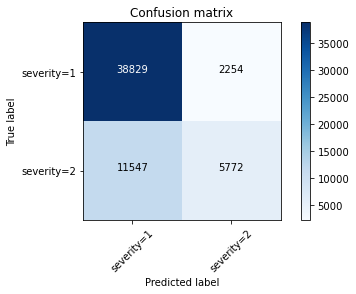

In [25]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')

below you can see the impact of each feature on our equation:

In [26]:
for i in lr.coef_[0]:
#     print("{:.3f}".format(i))
#     print(np.where(lr.coef_[0] == i)[0][0])
    print(f'{collisions.columns[np.where(lr.coef_[0] == i)[0][0] + 1]} feature impact is: {"{:.6f}".format(i)}.')

personcount feature impact is: 0.198430.
pedcount feature impact is: 0.503370.
pedcylcount feature impact is: 0.341942.
vehcount feature impact is: 0.238365.
inattentionind feature impact is: 0.043510.
underinfl feature impact is: 0.124257.
pedrownotgrnt feature impact is: 0.026172.
speeding feature impact is: 0.077925.
hitparkedcar feature impact is: -0.001111.
addrtype-alley feature impact is: -0.042357.
addrtype-block feature impact is: -0.151638.
addrtype-intersection feature impact is: -0.060635.
collisiontype-angles feature impact is: 0.073207.
collisiontype-cycles feature impact is: 0.049018.
collisiontype-head-on feature impact is: 0.026921.
collisiontype-left-turn feature impact is: 0.046869.
collisiontype-other feature impact is: -0.009222.
collisiontype-parked-car feature impact is: -0.378953.
collisiontype-pedestrian feature impact is: -0.000166.
collisiontype-rear-ended feature impact is: 0.076525.
collisiontype-right-turn feature impact is: -0.029156.
collisiontype-sidesw